In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("plant_health_data.csv")
df

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,54:53.4,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,54:53.4,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,54:53.4,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,54:53.4,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,54:53.4,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,54:53.5,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
1196,54:53.5,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
1197,54:53.5,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress
1198,54:53.5,10,30.971675,23.019488,21.934918,41.387107,492.952014,5.855767,49.402550,23.843971,19.750042,46.027529,0.344597,Healthy


In [11]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
df.head()

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,54:53.4,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,54:53.4,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,54:53.4,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,54:53.4,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,54:53.4,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


In [17]:
df.shape

(1200, 14)

In [19]:
from wolta.data_tools import col_types

types = col_types(df, print_columns=True)

Timestamp: str
Plant_ID: int64
Soil_Moisture: float64
Ambient_Temperature: float64
Soil_Temperature: float64
Humidity: float64
Light_Intensity: float64
Soil_pH: float64
Nitrogen_Level: float64
Phosphorus_Level: float64
Potassium_Level: float64
Chlorophyll_Content: float64
Electrochemical_Signal: float64
Plant_Health_Status: str


In [21]:
from wolta.data_tools import seek_null

seeked = seek_null(df, print_columns=True)

In [23]:
from wolta.data_tools import unique_amounts

unique_amounts(df)

{'Timestamp': 2,
 'Plant_ID': 10,
 'Soil_Moisture': 1200,
 'Ambient_Temperature': 1200,
 'Soil_Temperature': 1200,
 'Humidity': 1200,
 'Light_Intensity': 1200,
 'Soil_pH': 1200,
 'Nitrogen_Level': 1200,
 'Phosphorus_Level': 1200,
 'Potassium_Level': 1200,
 'Chlorophyll_Content': 1200,
 'Electrochemical_Signal': 1200,
 'Plant_Health_Status': 3}

# Data Manipulation

In [26]:
from wolta.feature_tools import list_deletings

df = list_deletings(df, extra=['Plant_ID', 'Timestamp'])

The maximum tolerated null value amount is 240
The maximum tolerated unique value amount is 120 in string data


In [28]:
from wolta.data_tools import make_numerics

df['Plant_Health_Status'], outs = make_numerics(df['Plant_Health_Status'], space_requested=True)

print(outs)
outs = list(outs)
print(outs)

{'High Stress': 0, 'Moderate Stress': 1, 'Healthy': 2}
['High Stress', 'Moderate Stress', 'Healthy']


# Data Analysis

In [31]:
df.head()

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,0
1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,0
2,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,0
3,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,0
4,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,0


In [33]:
df.describe()

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,25.106918,23.999130,19.957794,54.853165,612.637265,6.524102,30.106751,30.264484,30.112088,34.749591,0.987764,0.832500
std,8.677725,3.441561,2.932073,8.784916,228.318853,0.581755,11.514396,11.466846,11.668085,8.766995,0.575116,0.798942
min,10.000724,18.001993,15.003710,40.028758,200.615482,5.507392,10.003650,10.017690,10.000606,20.025511,0.002376,0.000000
25%,17.131893,21.101766,17.353027,47.019694,416.878983,6.026042,20.249774,20.894445,19.585561,27.463350,0.487982,0.000000
50%,25.168333,23.889044,19.911473,54.692069,617.240221,6.540524,30.138590,30.019385,30.495054,34.433427,0.981647,1.000000
75%,32.370231,27.042634,22.596851,62.451053,811.474690,7.030039,40.184737,40.131459,40.108296,42.232637,1.473142,1.000000
max,39.993164,29.990886,24.995929,69.968871,999.856261,7.497823,49.951136,49.980700,49.981945,49.990811,1.996116,2.000000


In [35]:
from wolta.data_tools import stat_sum

stat_sum(df,
        ['max', 'min', 'width', 'var', 'med'])

Soil_Moisture
max: 39.99316429
min: 10.0007236
width: 29.992440690000002
variance: 75.24015837339863
median: 25.16833303
***
Ambient_Temperature
max: 29.9908861
min: 18.00199267
width: 11.988893430000001
variance: 11.834472736929971
median: 23.88904394
***
Soil_Temperature
max: 24.99592885
min: 15.00371007
width: 9.992218779999998
variance: 8.589886952961713
median: 19.911472985
***
Humidity
max: 69.96887071
min: 40.02875752
width: 29.940113190000005
variance: 77.11043349942595
median: 54.69206904
***
Light_Intensity
max: 999.8562615
min: 200.6154818
width: 799.2407797
variance: 52086.05733929515
median: 617.2402215
***
Soil_pH
max: 7.497822504
min: 5.507391613
width: 1.990430891
variance: 0.33815733606349085
median: 6.540524244
***
Nitrogen_Level
max: 49.95113598
min: 10.00364972
width: 39.94748626
variance: 132.47082816030428
median: 30.13859027
***
Phosphorus_Level
max: 49.9807
min: 10.0176902
width: 39.963009799999995
variance: 131.37898738753415
median: 30.01938454
***
Potassium_L

<Axes: ylabel='count'>

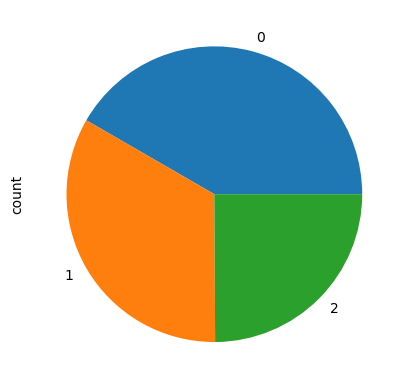

In [37]:
df['Plant_Health_Status'].value_counts().plot(kind='pie')

# Data Preparation 

In [47]:
y = df['Plant_Health_Status'].values
del df['Plant_Health_Status']
X = df.values
del df

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
del X, y

In [51]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

Counter({0: 400, 1: 321, 2: 239})
Counter({0: 100, 1: 80, 2: 60})


# Model

In [54]:
from wolta.model_tools import compare_models

results = compare_models('clf',
                        ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'rdg', 'per'],
                        ['acc', 'precision', 'f1'],
                        X_train, y_train, X_test, y_test,
                        get_result=True)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy Score: 0.75
Precision Score: 0.6071428571428572
F1 Score (weighted): 0.6590909090909091
***


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CatBoost
Accuracy Score: 0.9916666666666667
Precision Score: 0.9917079207920793
F1 Score (weighted): 0.9916595245063199
***
LightGBM
Accuracy Score: 0.9875
Precision Score: 0.9876711866693653
F1 Score (weighted): 0.9875139499645428
***
Random Forest
Accuracy Score: 1.0
Precision Score: 1.0
F1 Score (weighted): 1.0
***
Decision Tree
Accuracy Score: 0.9958333333333333
Precision Score: 0.9958745874587459
F1 Score (weighted): 0.995830595450421
***
Extra Tree
Accuracy Score: 0.65
Precision Score: 0.6577941254020988
F1 Score (weighted): 0.6516848328646877
***
Ridge
Accuracy Score: 0.6666666666666666
Precision Score: 0.6726630507566627
F1 Score (weighted): 0.6022174122174122
***
Perceptron
Accuracy Score: 0.4666666666666667
Precision Score: 0.7947648321623731
F1 Score (weighted): 0.40412314023425133
***
